In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
from functions import complex_correlation, colorize, show_colormap_image
import os

# for Jupyter lab
# %matplotlib widget
# for Jupyter notebook
# %matplotlib notebook
%matplotlib inline

data_folder = '../Data/'

SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# 1. First load the params and data

## Load parameters

In [2]:
file_path = os.path.sep.join([data_folder, 'param.json'])
with open(file_path,'r') as f:
    param = json.load(f)
    print('Succesfully loaded params of no pressure exp from json file')

Succesfully loaded params of no pressure exp from json file


## Load theoretical modes

In [3]:
path = os.path.sep.join([data_folder,'conversion_matrices.npz'])
data_dict = np.load(path)
modes_in = data_dict.f.modes_in
# create mode matrix for two polarizations
modes_in_full = np.kron(np.array([[1,0],[0,1]]),modes_in)
# number of input pixels
m = np.int(np.sqrt(modes_in.shape[1]))
modes_out = data_dict.f.modes_out
modes_out_full = np.kron(np.array([[1,0],[0,1]]),modes_out)
# number of output pixels
n = np.int(np.sqrt(modes_out.shape[1]))

## Load the mode basis TMs after correction

In [4]:
TM_modes = []
for i, pos in enumerate(param['Translation']['steps_pressure']):
    path = os.path.sep.join([data_folder,f'TM_modes_{str(pos)}.npz'])
    data_dict = np.load(path)
    TM_modes.append(data_dict.f.TM_corr_modes)
TM_modes = np.array(TM_modes)
Nmodes = TM_modes.shape[-1]//2

In [5]:
index_perturbed = 52
index_reference = 5
TM_perturb_mode = TM_modes[index_perturbed]
TM_ref_mode = TM_modes[index_reference]

## Load the raw pixel basis TMs

In [6]:
file_path = os.path.sep.join([data_folder, 'TM5_0.npy'])
part1 = np.load(file_path)
file_path = os.path.sep.join([data_folder, 'TM5_1.npy'])
part2 = np.load(file_path)
TM_ref_pix = np.concatenate([part1, part2], axis = 0)

file_path = os.path.sep.join([data_folder, 'TM52_0.npy'])
part1 = np.load(file_path)
file_path = os.path.sep.join([data_folder, 'TM52_1.npy'])
part2 = np.load(file_path)
TM_perturb_pix = np.concatenate([part1, part2], axis = 0)
del part1
del part2

## Calculate the mode basis TMs before correction

In [7]:
TM_ref_mode_before = modes_out_full@TM_ref_pix@modes_in_full.transpose().conjugate()
TM_perturb_mode_before = modes_out_full@TM_perturb_pix@modes_in_full.transpose().conjugate()

# Display TMs

## Mode basis TMs before correction

In [8]:
to_img = lambda x: colorize(x, beta = 1.4, max_threshold = 0.8)

mode = 'full'

if mode == 'half':
    n_end = Nmodes
elif mode == 'full':
    n_end = 2*Nmodes

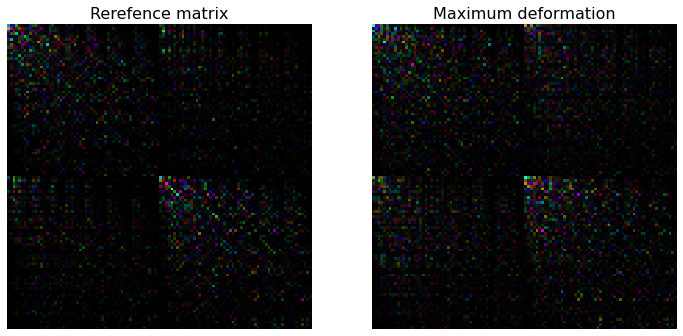

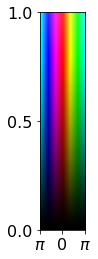

In [10]:
fig ,ax = plt.subplots(1,2, figsize = (12,6))
ax[0].imshow(to_img(TM_ref_mode_before[:n_end,:n_end]), interpolation = 'None')
ax[0].axis('off')
ax[0].set_title('Rerefence matrix')
ax[1].imshow(to_img(TM_perturb_mode_before[:n_end,:n_end]), interpolation = 'None')
ax[1].axis('off')
ax[1].set_title('Maximum deformation')

# fig.savefig('TMs_mode_complex_deform_full_before.svg', dpi = 'figure')

show_colormap_image(to_img, save_name = 'cm_TM_before.svg')



## Mode basis TMs after correction

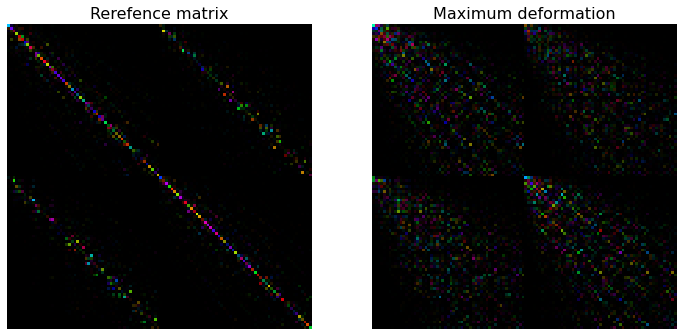

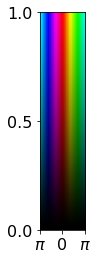

In [11]:
to_img = lambda x: colorize(x, beta = 1.4, max_threshold = 1.)

fig ,ax = plt.subplots(1,2, figsize = (12,6))
ax[0].imshow(to_img(TM_ref_mode[:n_end,:n_end]), interpolation = 'None')
ax[0].axis('off')
ax[0].set_title('Rerefence matrix')
ax[1].imshow(to_img(TM_perturb_mode[:n_end,:n_end]), interpolation = 'None')
ax[1].axis('off')
ax[1].set_title('Maximum deformation')

# fig.savefig('TMs_complex_deform_full.svg', dpi = 'figure')

show_colormap_image(to_img, save_name = 'cm_TM_after.svg')

## Pixel basis TMs 

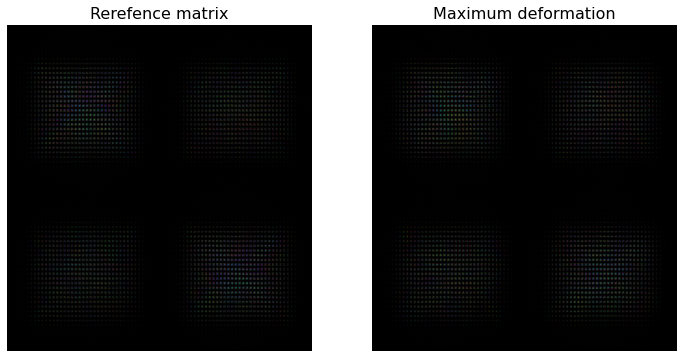

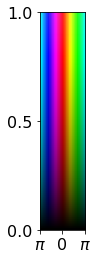

In [12]:
to_img = lambda x: colorize(x, beta = 1., max_threshold = 0.8)

fig ,ax = plt.subplots(1,2, figsize = (12,6))
ax[0].imshow(to_img(TM_ref_pix), aspect = 'auto')
ax[0].axis('off')
ax[0].set_title('Rerefence matrix')
ax[1].imshow(to_img(TM_perturb_pix), aspect = 'auto')
ax[1].axis('off')
ax[1].set_title('Maximum deformation')

# fig.savefig('TMs_pix_complex_deform_full.svg', dpi = 400)

show_colormap_image(to_img, save_name = 'cm_TM_pix.svg')

# Mode profiles

In [16]:
modes_to_show = [6, 8, 27, 37]
to_img = lambda x: colorize(x, beta = 1.5, max_threshold = 1.)
# to_img = lambda x: np.abs(x)**2
to_2D = lambda x,n: x.reshape([n]*2)
cmap = 'gray'

## Input modes

In [14]:
path = os.path.sep.join([data_folder,'modes_in_after_correction.npy'])
modes_in_after = np.load(path)

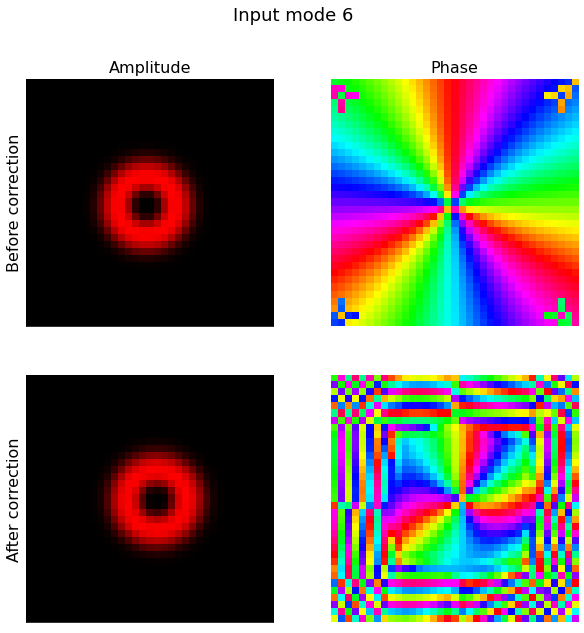

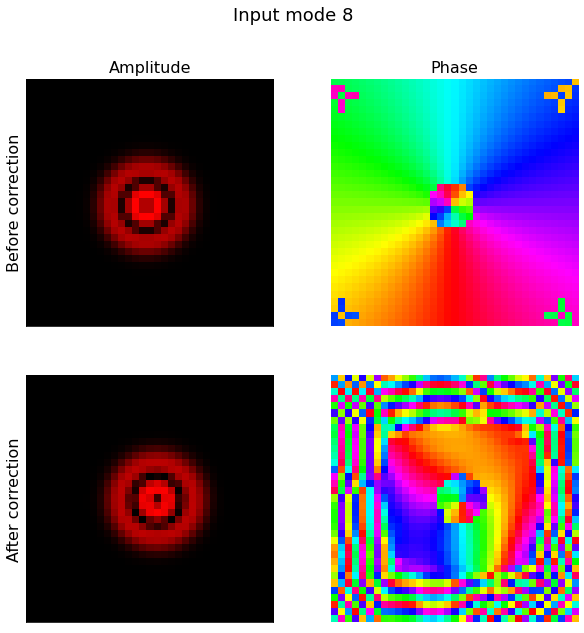

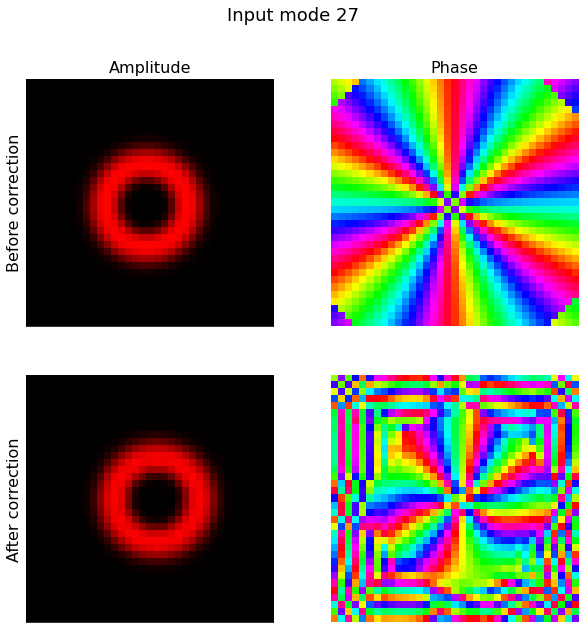

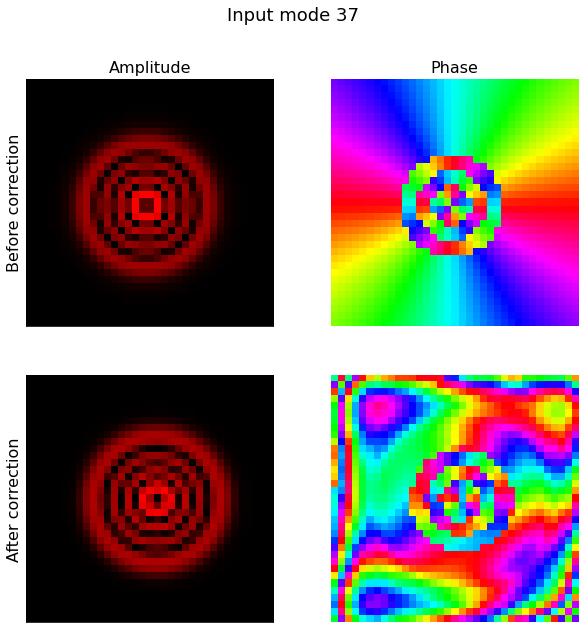

In [32]:
for ind in modes_to_show:
    Mode_before = np.fliplr(to_2D(modes_in[ind],m))
    Mode_after = to_2D(modes_in_after[ind],m)
    # set the phase to be equal close to the center for axisymmetric modes or shifted for other ones
    if np.abs(Mode_before[m//2,m//2]) > .9*np.max(np.abs(Mode_before)):
        shift = 0
    else:
        shift = 3
    Mode_after *= np.exp(1j*(np.angle(Mode_before[m//2+shift,m//2])-np.angle(Mode_after[m//2+shift,m//2]))) 

    fig ,ax = plt.subplots(2,2, figsize = (10,10))
    ax[0][0].imshow(to_img(np.abs(Mode_before)))
    ax[0][0].set_title('Amplitude')
    ax[0][0].set_ylabel('Before correction')
    ax[0][0].set_xticks([]); ax[0][0].set_yticks([]); 
    ax[0][1].imshow(to_img(np.exp(1j*np.angle(Mode_before))))
    ax[0][1].axis('off')
    ax[0][1].set_title('Phase')
    ax[1][0].imshow(to_img(np.abs(Mode_after)))
    ax[1][0].set_ylabel('After correction')
    ax[1][0].set_xticks([]); ax[1][0].set_yticks([]);
    ax[1][1].imshow(to_img(np.exp(1j*np.angle(Mode_after))))
    ax[1][1].axis('off')

    fig.suptitle(f'Input mode {ind}')
#     fig.savefig(f'mode_in_{ind}.svg', dpi = 400)

## Ouput modes

In [34]:
path = os.path.sep.join([data_folder,'modes_out_after_correction.npy'])
modes_out_after = np.load(path)
plt.close('all')

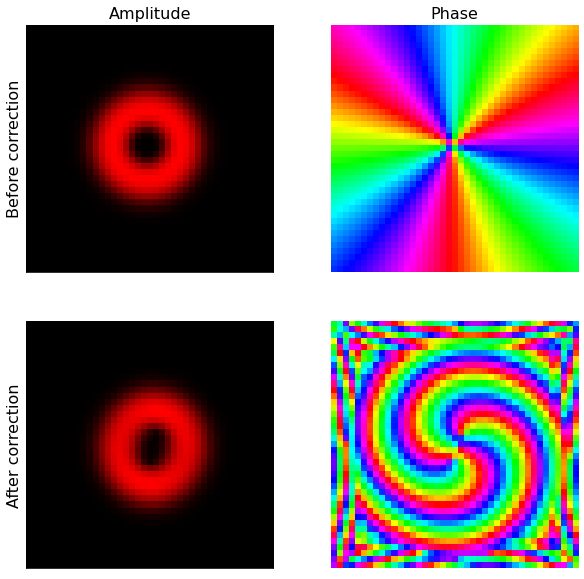

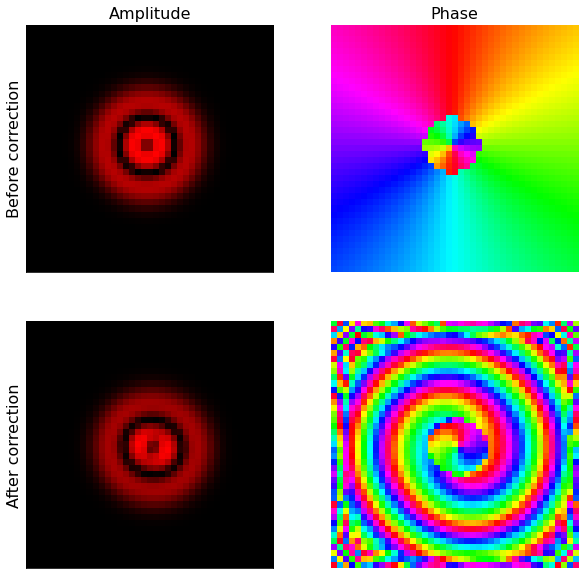

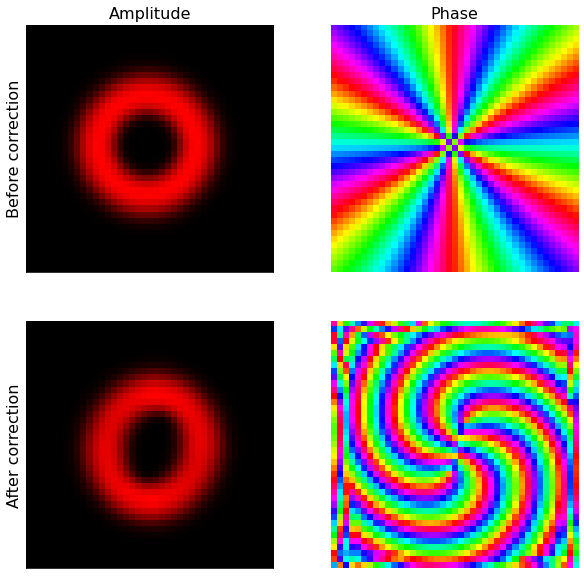

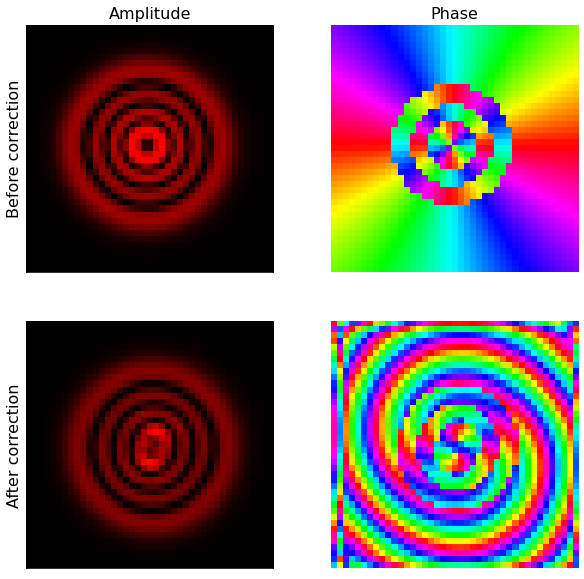

In [35]:
for ind in modes_to_show:
    Mode_before = to_2D(modes_out[ind],n)
    Mode_after = to_2D(modes_out_after[ind],n)
    # set the phase to be equal close to the center of the image
    Mode_after *= np.exp(1j*(np.angle(Mode_before[n//2+3,n//2])-np.angle(Mode_after[n//2+3,n//2]))) 

    fig ,ax = plt.subplots(2,2, figsize = (10,10))
    ax[0][0].imshow(to_img(np.abs(Mode_before)))
    ax[0][0].set_title('Amplitude')
    ax[0][0].set_ylabel('Before correction')
    ax[0][0].set_xticks([]); ax[0][0].set_yticks([]); 
    ax[0][1].imshow(to_img(np.exp(1j*np.angle(Mode_before))))
    ax[0][1].axis('off')
    ax[0][1].set_title('Phase')
    ax[1][0].imshow(to_img(np.abs(Mode_after)))
    ax[1][0].set_ylabel('After correction')
    ax[1][0].set_xticks([]); ax[1][0].set_yticks([]);
    ax[1][1].imshow(to_img(np.exp(1j*np.angle(Mode_after))))
    ax[1][1].axis('off')
    
    fig.savefig(f'mode_out_{ind}.svg', dpi = 400)

# Singular value decomposition of the TM

## No deformation

### SVD of the TM in the pixel basis

In [37]:
s_pix = np.linalg.svd(TM_ref_pix, compute_uv = False)
s_pix = s_pix/s_pix[0]

### SVD of the model basis TM before compensation of aberrations

In [38]:
s_mode_nocorr = np.linalg.svd(TM_ref_mode_before, compute_uv = False)
s_mode_nocorr = s_mode_nocorr/s_mode_nocorr[0]

### SVD of the model basis TM after compensation of aberrations

In [39]:
s_mode_corr = np.linalg.svd(TM_ref_mode, compute_uv = False)
s_mode_corr = s_mode_corr/s_mode_corr[0]

Text(0.5, 1.0, 'Singular values for $\\Delta x = 0$')

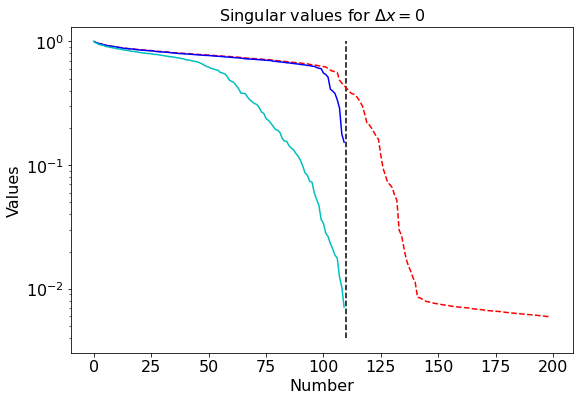

In [43]:
plt.figure(figsize = (9,6))
plt.semilogy(s_pix[:200], 'r--')
plt.semilogy(s_mode_corr[:150], 'b-')
plt.semilogy(s_mode_nocorr[:150], 'c')
plt.vlines(2*Nmodes,4e-3,1., 'k', linestyles = 'dashed')
plt.ylabel('Values')
plt.xlabel('Number')
plt.title(r'Singular values for $\Delta x = 0$')
# save figure
# plt.savefig('SVDs_TM_dx0.svg')

## Maximal deformation

### SVD of the TM in the pixel basis

In [13]:
s_pix = np.linalg.svd(TM_perturb_pix, compute_uv = False)
s_pix = s_pix/s_pix[0]

### SVD of the model basis TM before compensation of aberrations

In [14]:
s_mode_nocorr = np.linalg.svd(TM_perturb_mode_before, compute_uv = False)
s_mode_nocorr = s_mode_nocorr/s_mode_nocorr[0]

### SVD of the model basis TM after compensation of aberrations

In [15]:
s_mode_corr = np.linalg.svd(TM_perturb_mode, compute_uv = False)
s_mode_corr = s_mode_corr/s_mode_corr[0]

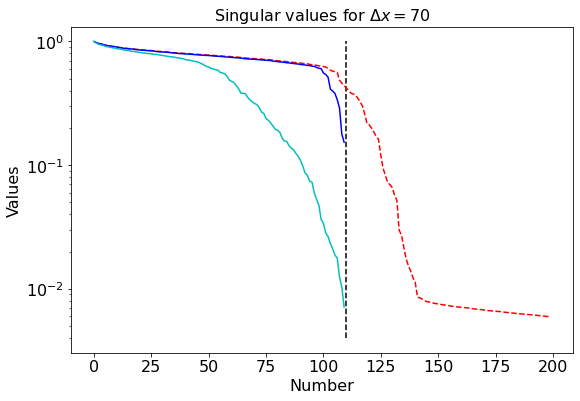

In [44]:
plt.figure(figsize = (9,6))
plt.semilogy(s_pix[:200], 'r--')
plt.semilogy(s_mode_corr[:150], 'b-')
plt.semilogy(s_mode_nocorr[:150], 'c')

plt.vlines(2*Nmodes,4e-3,1., 'k', linestyles = 'dashed')
plt.ylabel('Values')
plt.xlabel('Number')
plt.title(r'Singular values for $\Delta x = 70$')

# save figure
plt.savefig('SVDs_TM_dx70.svg')